In [1]:
import torch
import torch.nn as nn
import torchvision

from tqdm.auto import tqdm
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from helper_functions import accuracy_fn

c:\Users\enesy\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(
    root="data",
    transform=torchvision.transforms.ToTensor(),
    train=True,
    download=True,
    target_transform=None
)

test_dataset = torchvision.datasets.FashionMNIST(
    root="data",
    transform= torchvision.transforms.ToTensor(),
    train=False,
    download=True,
    )

train_dataloader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=256,
    shuffle=True,
)

test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=256
)

In [4]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
test_features_batch, test_labels_batch = next(iter(test_dataloader))

Image shape: torch.Size([1, 28, 28])
Dataset classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Class: Ankle boot


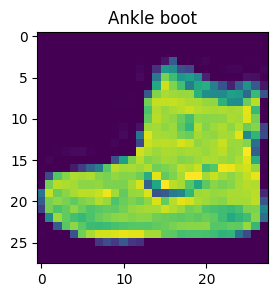

In [5]:
class_names = train_dataset.classes

plt.figure(figsize=(3,3))

image, label = train_dataset[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

print(f"Dataset classes: {train_dataset.classes}")
print(f"Class: {train_dataset.classes[label]}") 


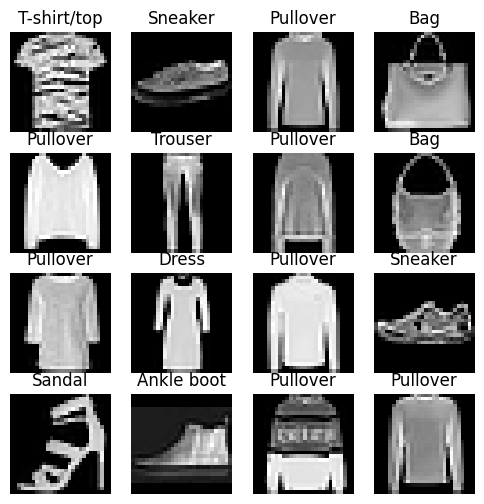

In [6]:
torch.manual_seed(57)

fig = plt.figure(figsize=(6,6))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_index = torch.randint(0, len(train_dataset), size=[1]).item()
    img, label = train_dataset[random_index]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

plt.show()

In [7]:
class FashionMNISTModel0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Verideki (1,28,28) boyutundaki tensörü tek boyutlu hale (784,) getiriyor. 
            # Burada in_features olarak linear katmana 784 sayısını veriyoruz, çünkü flatten sonrası veri bu boyutta oluyor.
            # Yani linear katman, girdide kaç feature (özellik) olduğunu bilmek zorunda, bu yüzden biz hesaplayıp input_shape olarak veriyoruz.

            nn.Linear(in_features= input_shape, out_features= hidden_units),
            nn.Linear(in_features=hidden_units, out_features= output_shape)
        )

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [8]:
model_0 = FashionMNISTModel0(input_shape=28*28, hidden_units= 32, output_shape= len(train_dataset.classes))
model_0.parameters

<bound method Module.parameters of FashionMNISTModel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)>

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer_0 = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [10]:
torch.manual_seed(57)

epochs = 5

model_0.to(device)
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch} \n----------")

    train_loss = 0
    for batch_index, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer_0.zero_grad()

        loss.backward()

        optimizer_0.step()


        if batch_index % 100 == 0:
            print(f"Looked at {batch_index * len(X)} / {len(train_dataloader.dataset)}")


    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y_pred=test_pred.argmax(dim=1), y_true=y)
        
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)

    print(f"\nTrain Loss: {train_loss:.5f} \tTest Loss: {test_loss:.5f} \tTest Accuracy: {test_acc:.5f}")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


 20%|██        | 1/5 [00:04<00:16,  4.18s/it]


Train Loss: 0.81954 	Test Loss: 0.62091 	Test Accuracy: 78.07617
Epoch: 1 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


 40%|████      | 2/5 [00:07<00:11,  3.96s/it]


Train Loss: 0.54663 	Test Loss: 0.56141 	Test Accuracy: 80.01953
Epoch: 2 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


 60%|██████    | 3/5 [00:11<00:07,  3.88s/it]


Train Loss: 0.50310 	Test Loss: 0.54183 	Test Accuracy: 80.57617
Epoch: 3 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


 80%|████████  | 4/5 [00:15<00:03,  3.82s/it]


Train Loss: 0.47916 	Test Loss: 0.76528 	Test Accuracy: 75.00000
Epoch: 4 
----------
Looked at 0 / 60000
Looked at 25600 / 60000
Looked at 51200 / 60000


100%|██████████| 5/5 [00:19<00:00,  3.85s/it]


Train Loss: 0.46598 	Test Loss: 0.51140 	Test Accuracy: 81.93359


In [11]:
def eval_model(
        model: nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: torch.nn.Module,
        accuracy_fn,
        device: torch.device = device):
    
    loss, acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            y_pred =model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))
        
        loss /= len(dataloader)
        acc /= len(dataloader)

    return {
        "model_name" : model.__class__.__name__,
        "model_loss" : loss.item(),
        "model_acc" : acc
    }

model_0_results = eval_model(model=model_0, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn= accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTModel0',
 'model_loss': 0.5114029049873352,
 'model_acc': 81.93359375}

In [12]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= output_shape)
        )

    
    def forward(self, X:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(X)

In [13]:
model_1 = FashionMNISTModelV1(input_shape= 28*28, hidden_units=32, output_shape= len(class_names)).to(device)
model_1.parameters

<bound method Module.parameters of FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
  )
)>

In [14]:
loss_fn = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [15]:
def train_step(
        model: nn.Module,
        dataloader: torch.utils.data.DataLoader,
        loss_fn: nn.Module,
        optimizer: torch.optim.Optimizer,
        accuracy_fn,
        device: torch.device = device):
    
        train_loss, train_acc = 0, 0
        model.to(device)
        
        for batch_index, (X,y) in enumerate(dataloader):
                X, y = X.to(device), y.to(device)

                y_pred =model(X)
                loss = loss_fn(y_pred, y)
                train_loss += loss

                train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

                optimizer.zero_grad()

                loss.backward()

                optimizer.step()


        train_loss /= len(dataloader)
        train_acc /= len(dataloader)
        print(f"Train Loss {train_loss:.5f} \tTrain Accuracy: {train_acc:.2f}%\n")


def test_step (
        model : nn.Module,
        dataloader : torch.utils.data.DataLoader,
        loss_fn : nn.Module,
        accuracy_fn,
        device: torch.device = device):


        test_loss, test_acc = 0, 0
        model.to(device)
        model.eval()
        with torch.inference_mode():
                for X, y in dataloader:
                        X, y = X.to(device), y.to(device)

                        y_pred = model(X)
                        loss = loss_fn(y_pred, y)
                        test_loss += loss

                        test_acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))
                
                test_loss /= (len(dataloader))
                test_acc /= len(dataloader)
        
        print(f"Test Loss {test_loss:.5f} \tTest Accuracy: {test_acc:.2f}%\n")
                


In [16]:
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch + 1}\n----------")

    train_step(
        model=model_1,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer_1,
        accuracy_fn=accuracy_fn
    )

    test_step(
        model=model_1,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )
    print("\n\n")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
----------
Train Loss 1.12514 	Train Accuracy: 59.73%



 20%|██        | 1/5 [00:04<00:16,  4.07s/it]

Test Loss 0.69924 	Test Accuracy: 73.38%




Epoch: 2
----------
Train Loss 0.62552 	Train Accuracy: 77.40%



 40%|████      | 2/5 [00:07<00:11,  3.88s/it]

Test Loss 0.59078 	Test Accuracy: 78.55%




Epoch: 3
----------
Train Loss 0.54059 	Train Accuracy: 80.64%



 60%|██████    | 3/5 [00:11<00:07,  3.59s/it]

Test Loss 0.52676 	Test Accuracy: 81.02%




Epoch: 4
----------
Train Loss 0.48941 	Train Accuracy: 82.41%



 80%|████████  | 4/5 [00:14<00:03,  3.44s/it]

Test Loss 0.55827 	Test Accuracy: 80.32%




Epoch: 5
----------
Train Loss 0.46478 	Train Accuracy: 83.31%



100%|██████████| 5/5 [00:17<00:00,  3.48s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%






In [17]:
model_1_results = eval_model(model=model_1, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.498768150806427,
 'model_acc': 82.109375}

In [18]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape:int):
        super().__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features= output_shape)
        )


    def forward(self, X:torch.Tensor) -> torch.Tensor:
        z = self.block1(X)
        z = self.block2(z)
        z = self.classifier(z)
        return z
    
    

In [19]:
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=32, output_shape= len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer_2 = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [21]:
epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch + 1}\n----------")

    train_step(
        model=model_2,
        dataloader=train_dataloader,
        loss_fn=loss_fn,
        optimizer=optimizer_2,
        accuracy_fn=accuracy_fn
    )

    test_step(
        model=model_1,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )
    print("\n\n")

model_2_reults = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)
model_2_reults

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1
----------
Train Loss 1.06848 	Train Accuracy: 63.27%



 10%|█         | 1/10 [00:04<00:37,  4.16s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 2
----------
Train Loss 0.50178 	Train Accuracy: 81.66%



 20%|██        | 2/10 [00:07<00:30,  3.75s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 3
----------
Train Loss 0.41266 	Train Accuracy: 85.08%



 30%|███       | 3/10 [00:11<00:25,  3.63s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 4
----------
Train Loss 0.36721 	Train Accuracy: 86.83%



 40%|████      | 4/10 [00:14<00:21,  3.55s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 5
----------
Train Loss 0.34417 	Train Accuracy: 87.58%



 50%|█████     | 5/10 [00:18<00:17,  3.53s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 6
----------
Train Loss 0.32207 	Train Accuracy: 88.50%



 60%|██████    | 6/10 [00:21<00:14,  3.51s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 7
----------
Train Loss 0.31017 	Train Accuracy: 88.82%



 70%|███████   | 7/10 [00:24<00:10,  3.47s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 8
----------
Train Loss 0.29587 	Train Accuracy: 89.44%



 80%|████████  | 8/10 [00:28<00:06,  3.46s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 9
----------
Train Loss 0.28328 	Train Accuracy: 89.90%



 90%|█████████ | 9/10 [00:31<00:03,  3.43s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%




Epoch: 10
----------
Train Loss 0.27517 	Train Accuracy: 90.10%



100%|██████████| 10/10 [00:35<00:00,  3.52s/it]

Test Loss 0.49877 	Test Accuracy: 82.11%






{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32930007576942444,
 'model_acc': 88.046875}

In [22]:
compare_df = pd.DataFrame([model_0_results, model_1_results, model_2_reults])
compare_df.head()

,model_name,model_loss,model_acc
0,FashionMNISTModel0,0.511403,81.933594
1,FashionMNISTModelV1,0.498768,82.109375
2,FashionMNISTModelV2,0.329300,88.046875


In [23]:
def make_predictions(
        model : nn.Module,
        data : list,
        device: torch.device = device):
    
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data: 
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logits = model(sample)

            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())

    
    return torch.stack(pred_probs)

In [24]:
import random
random.seed(57)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_dataset), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 8 (Bag)


In [25]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2]

tensor([[1.5132e-01, 1.1247e-04, 2.0213e-01, 9.5277e-04, 1.1263e-02, 3.9697e-05,
         3.4530e-02, 1.8599e-05, 5.9954e-01, 1.0779e-04],
        [1.8286e-04, 7.2202e-06, 4.6081e-01, 3.3495e-05, 3.3715e-01, 1.5312e-07,
         2.0161e-01, 2.4219e-08, 1.9482e-04, 5.9211e-07]])

In [26]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 2, 4, 9, 7, 1, 5, 8, 4])

In [27]:
test_labels, pred_classes

([8, 2, 4, 7, 9, 1, 5, 8, 4], tensor([8, 2, 4, 9, 7, 1, 5, 8, 4]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

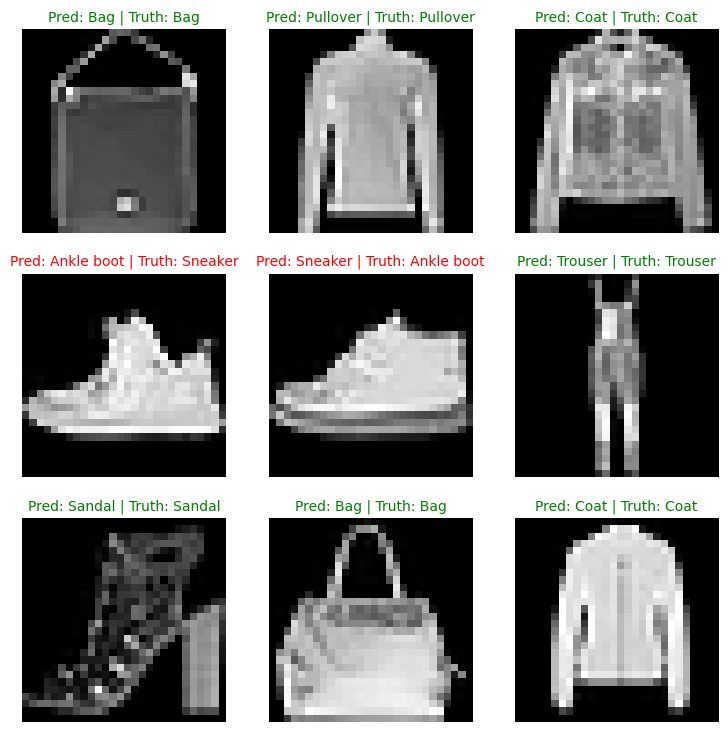

In [31]:
plt.figure(figsize=(9,9))

cols, rows = 3, 3

for i, sample in enumerate(test_samples):
    plt.subplot(cols, rows, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")

    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, c="g", fontsize=10)
    else:
        plt.title(title_text, c="r", fontsize=10)
    
    plt.axis(False)

plt.axis(False)
    

In [32]:
y_preds = []

model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc= "Making Predictions"):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)

        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred.cpu())
    
y_preds_tensor = torch.cat(y_preds)

Making Predictions: 100%|██████████| 40/40 [00:00<00:00, 55.76it/s]


In [33]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    %pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


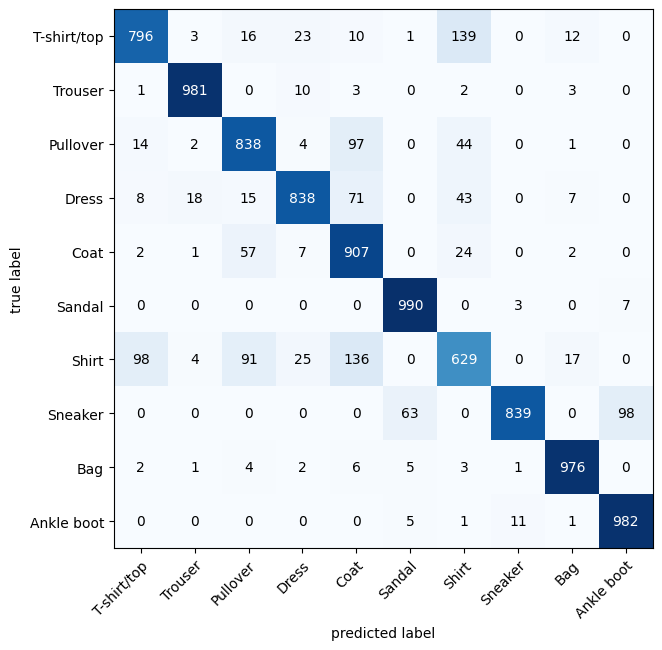

In [34]:
from mlxtend.plotting import plot_confusion_matrix

confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_preds_tensor, target=test_dataset.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names=class_names, figsize=(10,7))
